<a href="https://colab.research.google.com/github/remyaji/chromosome_segmentation-ChromSegP3GAN/blob/main/preprocess_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def mask_preprocess(mask):
    b,g,r = cv2.split(mask)
    b[b!=0] = 1
    g[g!=0] = 2
    r[r!=0] = 3
    h1 = g-b
    h2 = r-b
    h3 = g - h2
    h4 = r - h1
    th, hh2 = cv2.threshold(h2, 128, 1, cv2.THRESH_BINARY)
    th, hh3 = cv2.threshold(h3, 128, 1, cv2.THRESH_BINARY)
    th, hh4 = cv2.threshold(h4, 128, 1, cv2.THRESH_BINARY)
    hh2[hh2!=0] = 3
    hh3[hh3!=0] = 1
    hh4[hh4!=0] = 2
    out = hh2+hh3+hh4
    out[out>3] = 3
    return out

In [ ]:


org = []
mask = []
directory = "/content/drive/MyDrive/dataset_feb2023/over_rcc_dataset/label/"
out = '/content/drive/MyDrive/dataset_feb2023/over_rcc_dataset/masks/'
for filename in os.listdir(directory):
    if filename.endswith(".png"): 
        # print(os.path.join(directory, filename))
        data = cv2.imread(os.path.join(directory, filename))
        data = mask_preprocess(data)
        cv2.imwrite(os.path.join(out, filename), data)
        continue
    else:
        continue

In [ ]:
org = []
mask = []
path = "/content/drive/MyDrive/dataset_feb2023/over_rcc_dataset/"

org_pth = f"{path}image/"
mask_pth = f"{path}masks/"

for filename in os.listdir(org_pth):
    if filename.endswith(".png"): 
        #print(os.path.join(org_pth, filename))
        data1 = cv2.imread(os.path.join(org_pth, filename), 0)
        data1 = cv2.resize(data1, (93,94), interpolation = cv2.INTER_LINEAR)
        org.append(data1)
        data2 = cv2.imread(os.path.join(mask_pth, filename), 0)
        data2 = cv2.resize(data2, (93,94), interpolation = cv2.INTER_LINEAR)
        mask.append(data2)
        continue
    else:
        continue



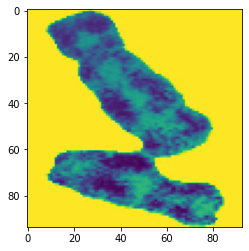

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(org[0][:,:])

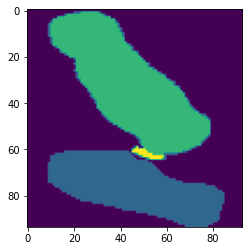

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(mask[0][:,:])

In [ ]:
import h5py

out = []
for i in range(len(mask)):
    out.append(np.dstack(( np.expand_dims(org[i] , axis=2), np.expand_dims(mask[i] , axis=2))))

h5f = h5py.File('/content/drive/MyDrive/dataset_feb2023/over_rcc_dataset/rcc_data_v1_preprocessed.h5', 'w')
h5f.create_dataset('rcc_data', data=out)
h5f.close()

In [ ]:
name = '/content/drive/MyDrive/dataset_feb2023/over_rcc_dataset/rcc_data_v1_preprocessed.h5'

In [ ]:
with h5py.File(name, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())

Keys: <KeysViewHDF5 ['rcc_data']>


In [ ]:
data = h5py.File(name, "r")

In [ ]:
data['rcc_data'].shape

(500, 94, 93, 2)